# Feed Forward Network Lyrics Classifier

In [1]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten, Bidirectional
from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import np_utils
#sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


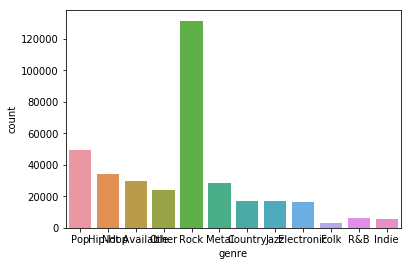

In [4]:
df = pd.read_pickle('../../data/lyrics.pkl', compression='gzip')
sns.countplot(df.genre)

### We limit the scope of this project to classifying to 4 genres so our data for each genre can be of equivalent size

In [5]:
#probably a better way to do this
df = df[(df.genre == 'Pop') | (df.genre == 'Hip-Hop') | (df.genre == 'Metal') | (df.genre == 'Rock')]
df.dropna(inplace=True)
df.groupby('genre').nunique('genre')

,index,song,year,artist,genre,lyrics
genre,,,,,,
Hip-Hop,24850,21479,32,1107,1,22648
Metal,23759,21852,33,996,1,22498
Pop,40466,32443,47,2066,1,37229
Rock,109235,85240,48,3765,1,102512


8000


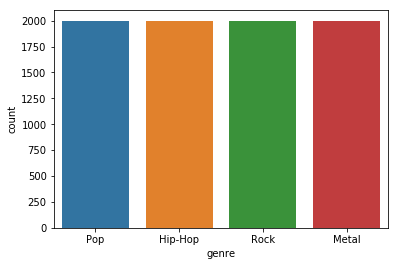

In [6]:
#also probably a better way to do this using 28408 because that is the smallest count
import matplotlib.pyplot as plt
pop = df.loc[df['genre']=='Pop'].head(2000)
hiphop = df.loc[df['genre']=='Hip-Hop'].head(2000)
rock = df.loc[df['genre']=='Rock'].head(2000)
metal = df.loc[df['genre']=='Metal'].head(2000)
#really ratchet
output = pop.append(hiphop)
output = output.append(rock)
output = output.append(metal)
output.dropna(inplace=True)
output.reset_index(drop=True, inplace=True)
print(len(output))
#but it works...
t = sns.countplot(output.genre)
plt.savefig('dataset.png')

# preprocess data
- convert our songs into numerical sequences each padded to the length of the longest song
- use one-hot encoding to encode our genres

creating our feature set w/Keras tokenizer class

In [7]:
#this value is the length of the longest song in our dataset.
MAX_VALUE = 8196
tok = Tokenizer(num_words=MAX_VALUE)
tok.fit_on_texts(df.lyrics)
#build sequences
sequences = tok.texts_to_sequences(output.lyrics)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=MAX_VALUE)
len(sequences_matrix)

8000

creating our target variables

In [8]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(output.genre)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Split data into test/train 80/20 split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,onehot_encoded,test_size=0.2)

In [13]:
model = Sequential()
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 166us/step - loss: 11.7956 - acc: 0.2620 - val_loss: 12.2142 - val_acc: 0.2412
Epoch 2/100
6400/6400 [==============================] - 1s 128us/step - loss: 9.8642 - acc: 0.3847 - val_loss: 9.5234 - val_acc: 0.4075
Epoch 3/100
6400/6400 [==============================] - 1s 142us/step - loss: 9.6683 - acc: 0.3947 - val_loss: 9.3840 - val_acc: 0.4144
Epoch 4/100
6400/6400 [==============================] - 1s 154us/step - loss: 9.2417 - acc: 0.4216 - val_loss: 9.2085 - val_acc: 0.4238
Epoch 5/100
6400/6400 [==============================] - 1s 128us/step - loss: 9.2190 - acc: 0.4225 - val_loss: 9.5060 - val_acc: 0.4081
Epoch 6/100
6400/6400 [==============================] - 1s 146us/step - loss: 9.3872 - acc: 0.4134 - val_loss: 9.2895 - val_acc: 0.4175
Epoch 7/100
6400/6400 [==============================] - 1s 137us/step - loss: 9.2115 - acc: 0.4244 - val_loss: 9.1573 - val_acc

6400/6400 [==============================] - 1s 130us/step - loss: 9.0969 - acc: 0.4298 - val_loss: 9.2570 - val_acc: 0.4213
Epoch 61/100
6400/6400 [==============================] - 1s 126us/step - loss: 9.2035 - acc: 0.4233 - val_loss: 9.2321 - val_acc: 0.4219
Epoch 62/100
6400/6400 [==============================] - 1s 126us/step - loss: 9.1793 - acc: 0.4253 - val_loss: 9.2221 - val_acc: 0.4231
Epoch 63/100
6400/6400 [==============================] - 1s 124us/step - loss: 9.2332 - acc: 0.4181 - val_loss: 9.3073 - val_acc: 0.4181
Epoch 64/100
6400/6400 [==============================] - 1s 123us/step - loss: 9.3121 - acc: 0.4173 - val_loss: 9.2642 - val_acc: 0.4206
Epoch 65/100
6400/6400 [==============================] - 1s 124us/step - loss: 9.1618 - acc: 0.4266 - val_loss: 9.1724 - val_acc: 0.4263
Epoch 66/100
6400/6400 [==============================] - 1s 135us/step - loss: 9.0838 - acc: 0.4312 - val_loss: 9.1682 - val_acc: 0.4269
Epoch 67/100
6400/6400 [=======================

### Pretrained model

In [17]:
model.load_weights('models/full_word_classifier_FFN.h5')

In [18]:
model.evaluate(x=X_train, y=Y_train, verbose=1)

6400/6400 [==============================] - 1s 85us/step


[9.182485146522522, 0.425]